<a href="https://colab.research.google.com/github/Udaybairi/AI-ML/blob/main/AIML_LAB_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Random Forest applied to LendingClub data set***

# Import Libraries and data set
Import the usual libraries for pandas and plotting

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get the Data
** Use pandas to read loan_data.csv**

In [40]:
df = pd.read_csv('/content/drive/MyDrive/Data Sets/loan_data.csv')

# Check out the info(), head(), and describe() methods on loans

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [42]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [43]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [44]:
print("Breakup of credit approval status.\n 1 means approved credit,\n 0 means not approved.")
print(df['credit.policy'].value_counts())

Breakup of credit approval status.
 1 means approved credit,
 0 means not approved.
credit.policy
1    7710
0    1868
Name: count, dtype: int64


In [45]:
print(f"Top 5 criteria for Loan Approval:\n{df['purpose'].value_counts()}")

Top 5 criteria for Loan Approval:
purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64


In [46]:
print(f"Top 5 Int.Rates for Loan Approval:\n{df['int.rate'].value_counts()}")

Top 5 Int.Rates for Loan Approval:
int.rate
0.1253    354
0.0894    299
0.1183    243
0.1218    215
0.0963    210
         ... 
0.2016      1
0.1683      1
0.1778      1
0.1756      1
0.1867      1
Name: count, Length: 249, dtype: int64


# Exploratory Data Analysis
Histogram of FICO scores by credit approval status

Text(0.5, 0, 'FICO score')

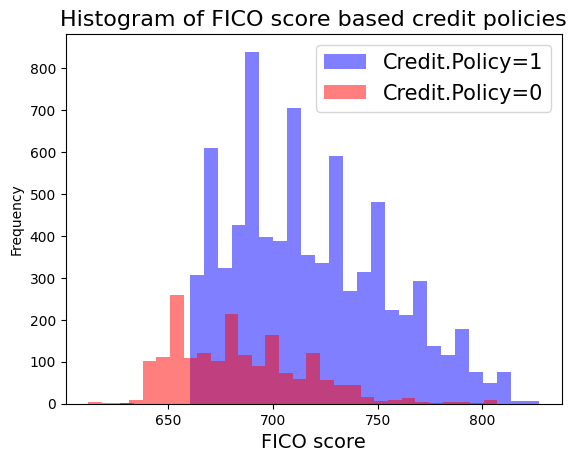

In [47]:
df[df['credit.policy']==1]['fico'].plot.hist(bins=30,
                                             alpha=0.5,color='blue',
                                             label='Credit.Policy=1')

df[df['credit.policy']==0]['fico'].plot.hist(bins=30,
                                             alpha=0.5, color='red',
                                             label='Credit.Policy=0')
plt.legend(fontsize=15)
plt.title ("Histogram of FICO score based credit policies", fontsize=16)
plt.xlabel("FICO score", fontsize=14)

Presence or absence of statistical difference of various factors between credit approval status

Text(0, 0.5, 'Interest rate')

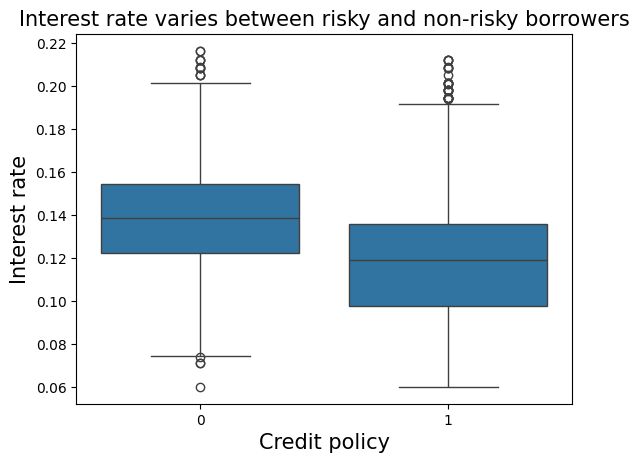

In [48]:
sns.boxplot(x=df['credit.policy'],y=df['int.rate'])
plt.title("Interest rate varies between risky and non-risky borrowers", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Interest rate",fontsize=15)

Text(0, 0.5, 'Log. annual income')

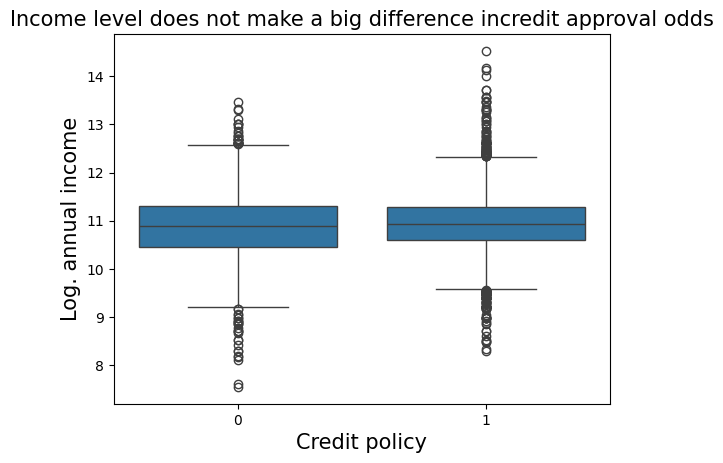

In [49]:
sns.boxplot(x=df['credit.policy'],y=df['log.annual.inc'])
plt.title("Income level does not make a big difference incredit approval odds", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Log. annual income",fontsize=15)

Text(0, 0.5, 'Days with credit line')

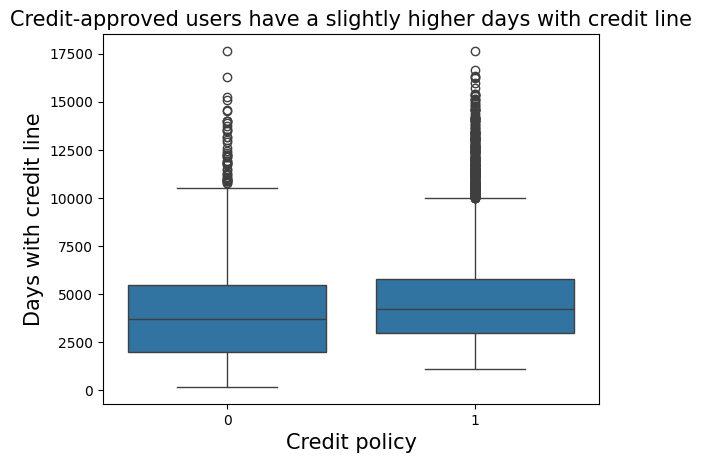

In [50]:
sns.boxplot(x=df['credit.policy'],y=df['days.with.cr.line'])
plt.title("Credit-approved users have a slightly higher days with credit line", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Days with credit line",fontsize=15)

Text(0, 0.5, 'Debt-to-income ratio')

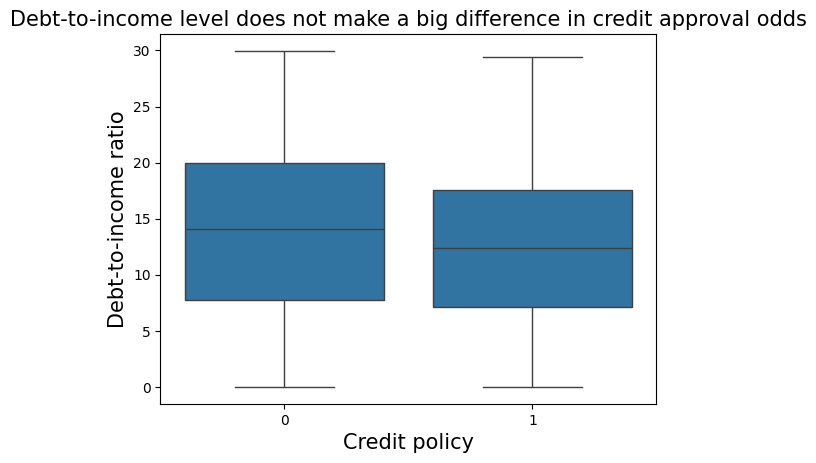

In [51]:
sns.boxplot(x=df['credit.policy'],y=df['dti'])
plt.title("Debt-to-income level does not make a big difference in credit approval odds", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Debt-to-income ratio",fontsize=15)

# Countplot of loans by purpose, with the color hue defined by not.fully.paid

Text(0.5, 0, 'Purpose')

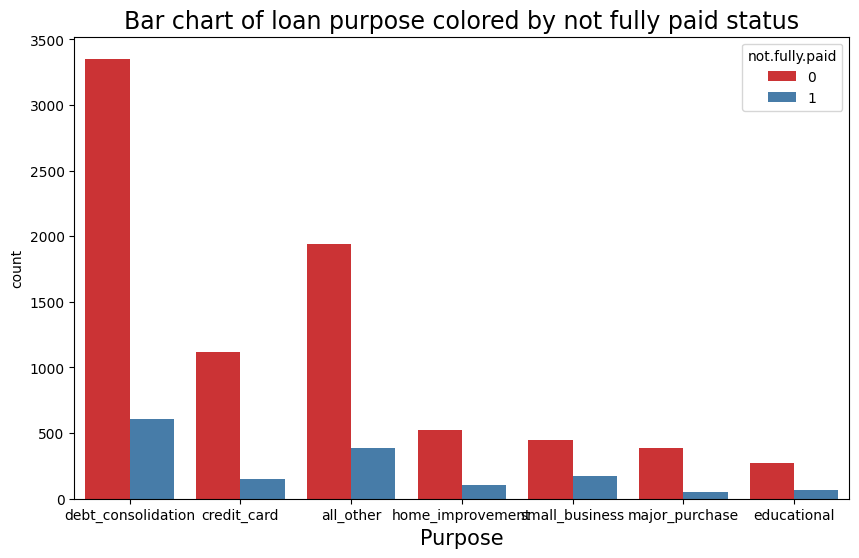

In [52]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose',hue='not.fully.paid',data=df, palette='Set1')
plt.title("Bar chart of loan purpose colored by not fully paid status", fontsize=17)
plt.xlabel("Purpose", fontsize=15)

# Trend between FICO score and interest rate

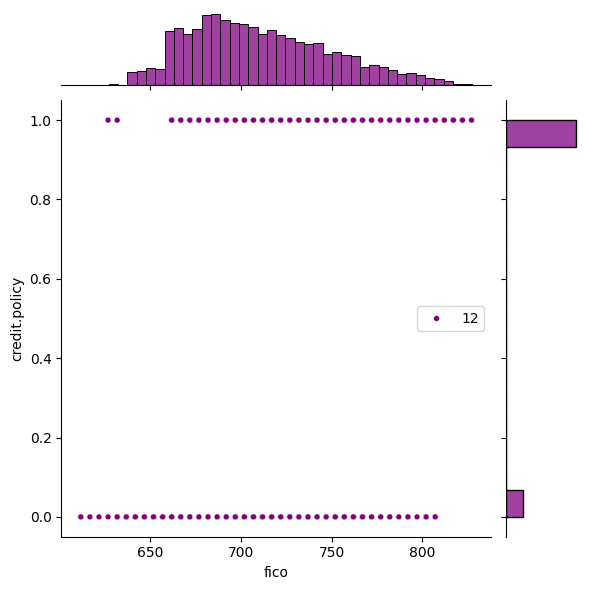

In [53]:
sns.jointplot(x='fico',y='credit.policy',data=df, color='purple', size=12)

# lmplot to see if the trend differed between not.fully.paid and credit.policy

<Figure size 1400x700 with 0 Axes>

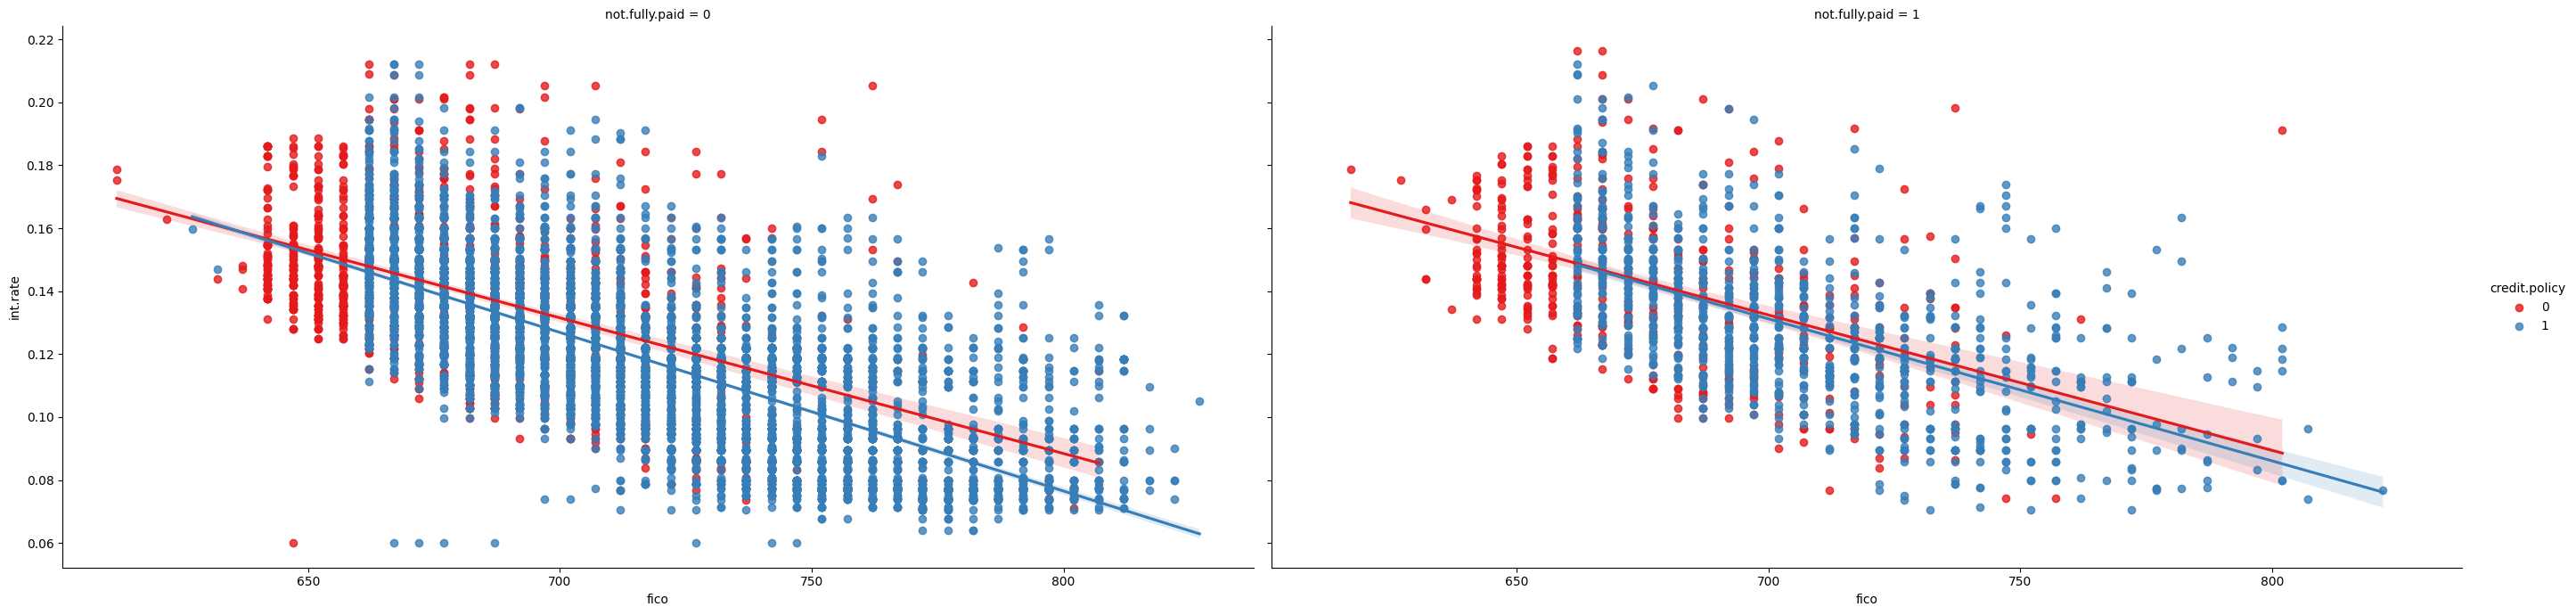

In [54]:
plt.figure(figsize=(14,7))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',col='not.fully.paid',palette='Set1',height=7, aspect=2)

# Setting up the Data
# Categorical Features
The purpose column as categorical. We transform them using dummy variables so sklearn will be able to understand them.

In [55]:
df_final = pd.get_dummies(df,['purpose'],drop_first=True)


In [56]:
df.shape, df_final.shape, df_final.columns[14:]

((9578, 14),
 (9578, 19),
 Index(['purpose_debt_consolidation', 'purpose_educational',
        'purpose_home_improvement', 'purpose_major_purchase',
        'purpose_small_business'],
       dtype='object'))

# Train Test Split

In [57]:
from sklearn.model_selection import train_test_split
X = df_final.drop('not.fully.paid',axis=1)
y = df_final['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [58]:
df_final.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9578, 19), (7662, 18), (1916, 18), (7662,), (1916,))

# Training a Decision Tree Model

In [59]:
from sklearn.tree import DecisionTreeClassifier

Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.



In [60]:
dtree = DecisionTreeClassifier(criterion='log_loss',max_depth=None)


In [61]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='log_loss')

Predictions and Evaluation of Decision Tree
Create predictions from the test set and create a classification report and a confusion matrix.



In [62]:
train_pred  = dtree.predict(X_train)
predictions = dtree.predict(X_test)

In [63]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [64]:
print(f"Accuracy of Train:{accuracy_score(y_train,train_pred)}")
print(f"Accuracy of Test:{accuracy_score(y_test,predictions)}")

Accuracy of Train:1.0
Accuracy of Test:0.7265135699373695


In [65]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1623
           1       0.17      0.19      0.18       293

    accuracy                           0.73      1916
   macro avg       0.51      0.51      0.51      1916
weighted avg       0.75      0.73      0.74      1916



In [66]:
cm=confusion_matrix(y_test,predictions)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[1335  288]
 [ 236   57]]
Accuracy of prediction: 0.727


# Training the Random Forest model
Now its time to train our model!

Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rfc = RandomForestClassifier(n_estimators=1000)

In [69]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

# Predictions and Evaluation
Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [70]:
rfc_train_pred = rfc.predict(X_train)
rfc_test_pred = rfc.predict(X_test)

In [71]:

print(f"Accuracy of Train:{accuracy_score(y_train,rfc_train_pred)}")
print(f"Accuracy of Test:{accuracy_score(y_test,rfc_test_pred)}")

Accuracy of Train:1.0
Accuracy of Test:0.8475991649269311


**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [72]:
cr = classification_report(y_test,predictions)

In [73]:
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1623
           1       0.17      0.19      0.18       293

    accuracy                           0.73      1916
   macro avg       0.51      0.51      0.51      1916
weighted avg       0.75      0.73      0.74      1916



Show the Confusion Matrix for the predictions.

In [79]:
cm = confusion_matrix(y_test,rfc_pred)
print(cm)

[[1614    9]
 [ 290    3]]


In [77]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

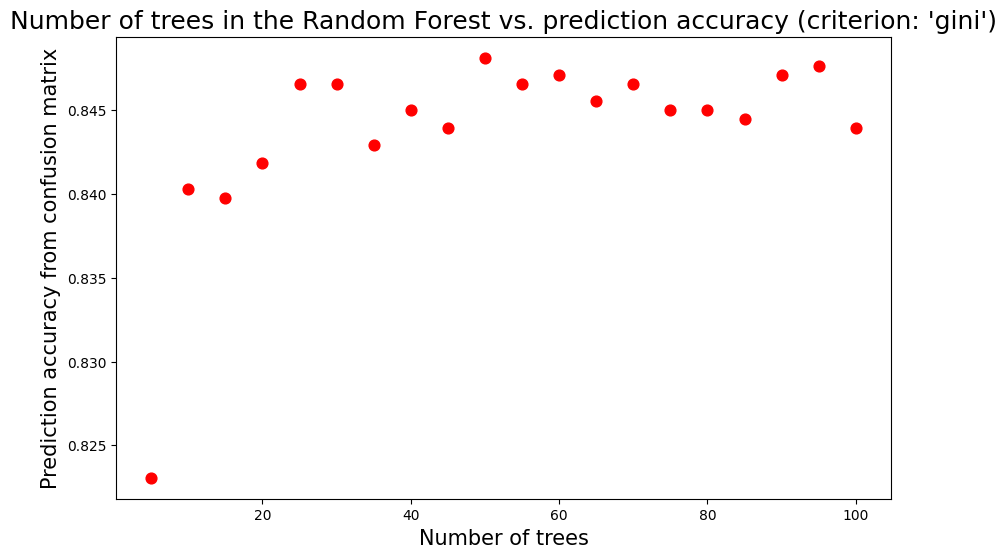

In [78]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'gini')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [80]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='entropy')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

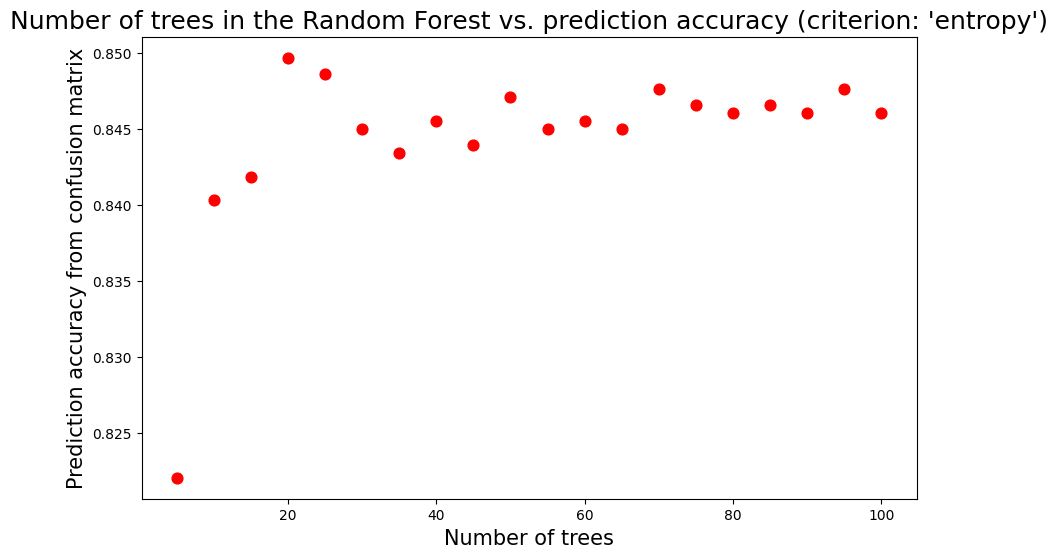

In [81]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'entropy')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [85]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

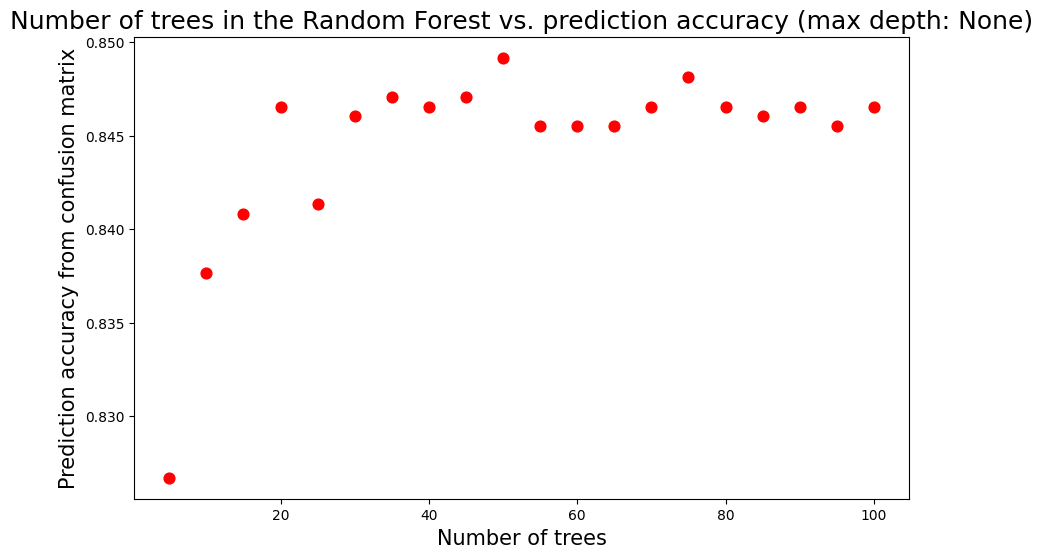

In [86]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (max depth: None)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [87]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=5,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

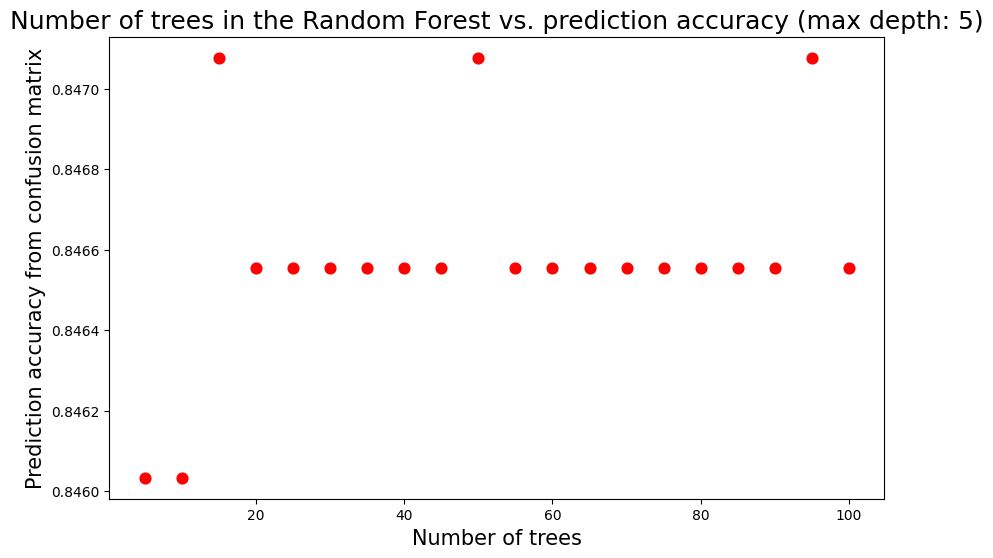

In [88]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (max depth: 5)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [89]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=2,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

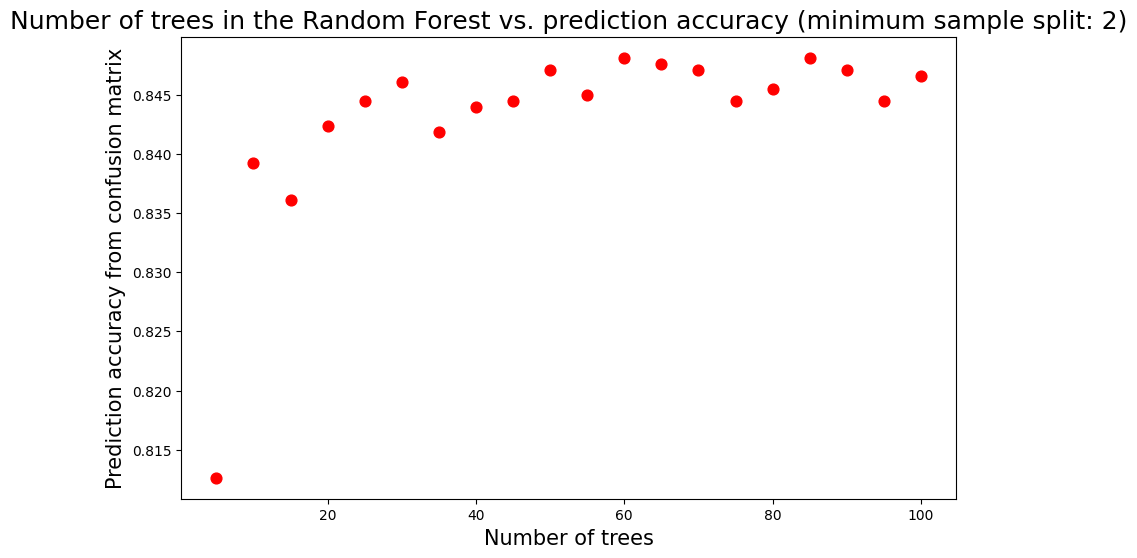

In [90]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (minimum sample split: 2)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

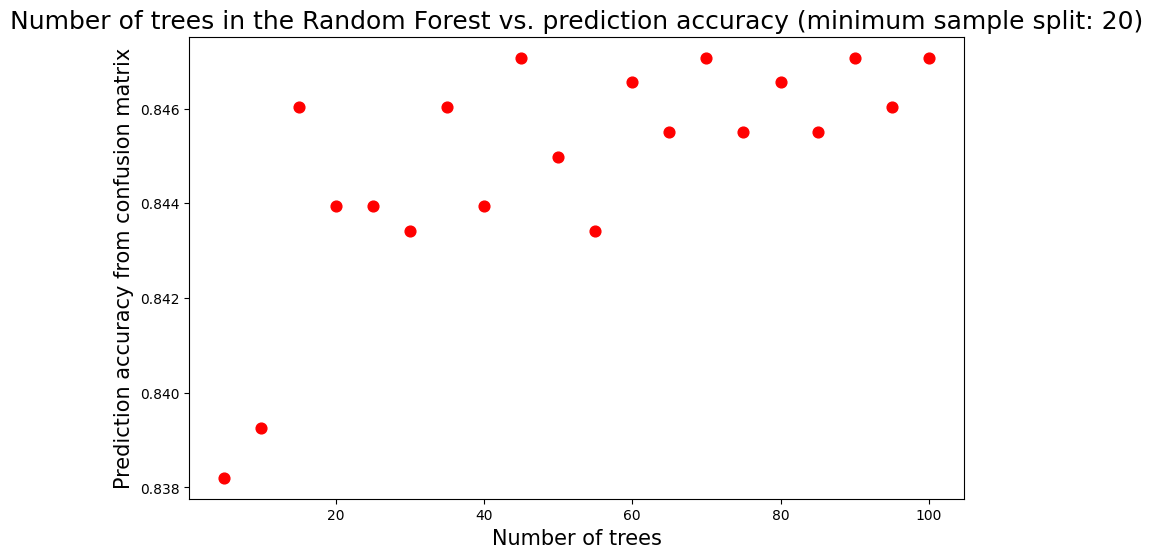

In [91]:
simu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=20,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (minimum sample split: 20)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)